**RUN ALL THE CELLS AND DON'T EDIT ANY CELL**

**CODE IN THE MENTIONED CELLS ONLY**

## Import Necessary Files

In [87]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Add ```/path/to/your/folder``` to load the images

In [88]:
cartoon = cv2.imread("/content/drive/MyDrive/LS_Animals/images/cartoon.bmp")
cartoon_y = cv2.imread("/content/drive/MyDrive/LS_Animals/images/cartoon_y.jpg")
girl = cv2.imread("/content/drive/MyDrive/LS_Animals/images/girl.jpg") #grayscale image
girl_y = cv2.imread("/content/drive/MyDrive/LS_Animals/images/girl_y.jpg")
fingerprint = cv2.imread("/content/drive/MyDrive/LS_Animals/images/fingerprint.jpg")
fingerprint_y = cv2.imread("/content/drive/MyDrive/LS_Animals/images/fingerprint_y.jpg")

## Raw and Final Image
You need to process the raw images: ```cartoon, girl, fingerprint``` to get the processed images: ```cartoon_y, girl_y, fingerprint_y```

Your processed image need not be 100% alike given processed image. They are given to give you an idea of what to process in the raw images.

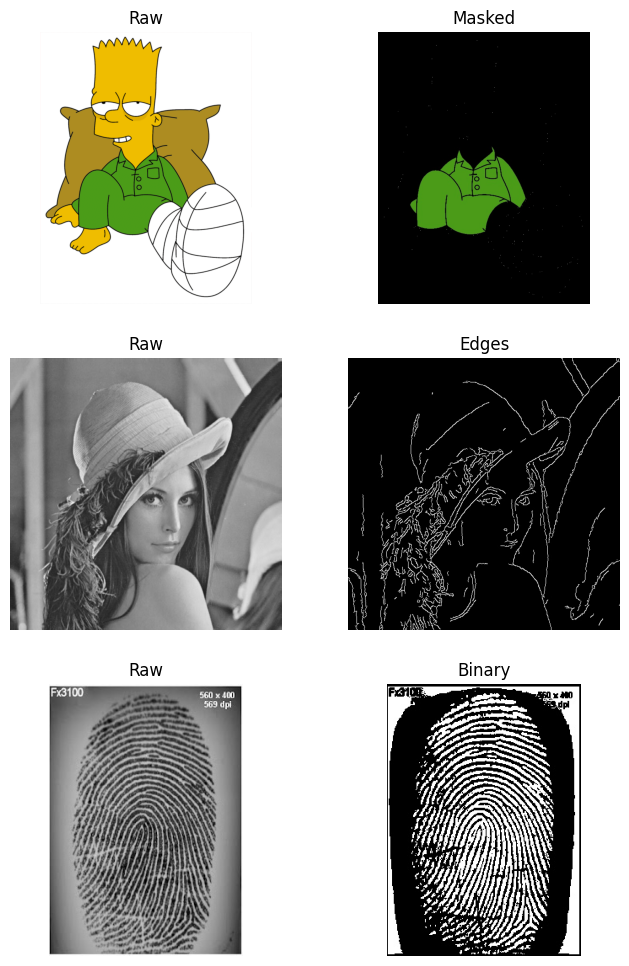

In [89]:
fig, axs = plt.subplots(3,2,figsize=(8,12))
axs[0,0].imshow(cv2.cvtColor(cartoon,cv2.COLOR_BGR2RGB))
axs[0,1].imshow(cartoon_y)
axs[0,0].axis("off")
axs[0,1].axis("off")
axs[0,0].set_title("Raw")
axs[0,1].set_title("Masked")
axs[1,0].imshow(girl)
axs[1,1].imshow(girl_y)
axs[1,0].axis("off")
axs[1,1].axis("off")
axs[1,0].set_title("Raw")
axs[1,1].set_title("Edges")
axs[2,0].imshow(cv2.cvtColor(fingerprint,cv2.COLOR_BGR2RGB))
axs[2,1].imshow(fingerprint_y)
axs[2,0].axis("off")
axs[2,1].axis("off")
axs[2,0].set_title("Raw")
axs[2,1].set_title("Binary")
plt.show()

## Code in the following 3 cells only

### Cartoon
For the bart image, you need to mask the dress. Write all your code in the cell below and the final image should be stored in ```cartoon_y_mentee``` variable only or it'll show error later.

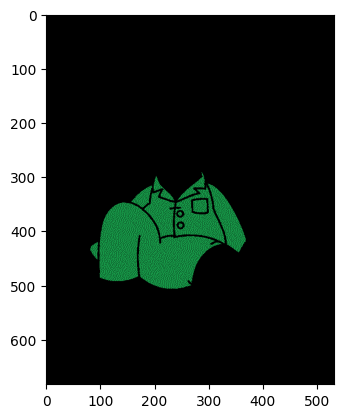

In [90]:
#START CODE HERE (Do all your processing here)
mask = cv2.inRange(cartoon, np.array([ 24 ,156 , 74]), np.array([ 24, 156 , 74]))
cartoon_y_mentee = cv2.bitwise_or(cartoon, cartoon, mask=mask)
plt.imshow(cartoon_y_mentee) #(in BGR format only)
#END CODE HERE (the final processed image should be cartoon_y_mentee)

### Girl
For the girl image, you need to detect the edges. Write all your code in the cell below and the final image should be stored in ```girl_y_mentee``` variable only or it'll show error later.

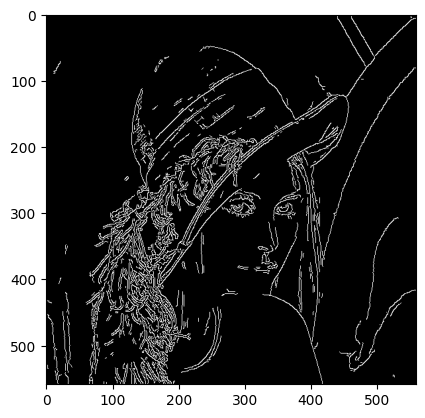

In [91]:
#START CODE HERE (Do all your processing here)
def convert_3d_to_2d(arr):
    if np.all(arr == arr[..., 0:1]):
        result = arr[..., 0]
        return result
gray = convert_3d_to_2d(girl)
girl_y_mentee = cv2.Canny(gray, 100, 150)
plt.imshow(girl_y_mentee,'gray')
plt.show()
#END CODE HERE (the final processed image should be girl_y_mentee)

### Fingerprint
For the fingerprint image, you need to convert it to binary image. Binary images have 2 intensities only (0 or 255). Write all your code in the cell below and the final image should be stored in ```cartoon_y_mentee``` variable only or it'll show error later.

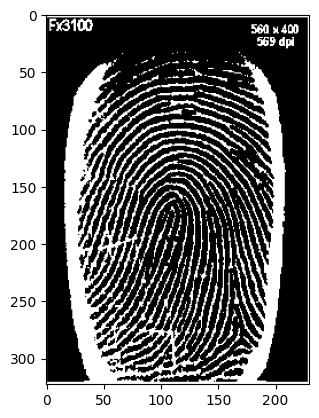

In [92]:
#START CODE HERE (Do all your processing here)
_, binary = cv2.threshold(fingerprint, 150, 255, cv2.THRESH_BINARY)
fingerprint_y_mentee = binary
plt.imshow(fingerprint_y_mentee)
#END CODE HERE (the final processed image should be fingerprint_y_mentee)

## Comparison

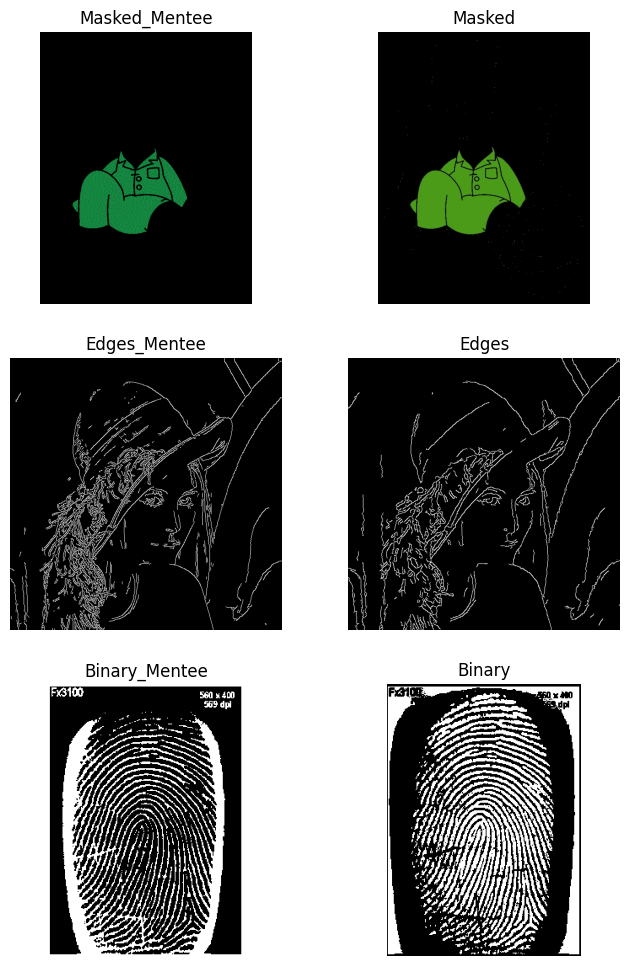

In [93]:
fig, axs1 = plt.subplots(3,2,figsize=(8,12))
axs1[0,0].imshow(cartoon_y_mentee)
axs1[0,1].imshow(cartoon_y)
axs1[0,0].axis("off")
axs1[0,1].axis("off")
axs1[0,0].set_title("Masked_Mentee")
axs1[0,1].set_title("Masked")
axs1[1,0].imshow(girl_y_mentee,cmap="gray")
axs1[1,1].imshow(girl_y)
axs1[1,0].axis("off")
axs1[1,1].axis("off")
axs1[1,0].set_title("Edges_Mentee")
axs1[1,1].set_title("Edges")
axs1[2,0].imshow(fingerprint_y_mentee,cmap="gray")
axs1[2,1].imshow(fingerprint_y)
axs1[2,0].axis("off")
axs1[2,1].axis("off")
axs1[2,0].set_title("Binary_Mentee")
axs1[2,1].set_title("Binary")
plt.show()